In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [27]:
df = pd.read_csv("Mall_Customers.csv")

In [28]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [29]:
x= df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


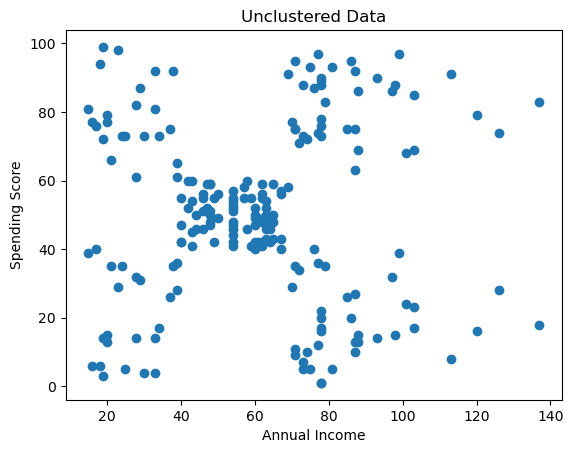

In [30]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)']);

In [32]:
#Finding the optimum number of clusters 
#USing Elbow Method

sse=[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)
sse

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37271.88623658948,
 30227.60651315203,
 25018.576334776328,
 22787.737043908466,
 19643.655552199743,
 17851.808510352705,
 16457.86097529921,
 14437.20179578487,
 12775.343451156687,
 12261.268769293765]

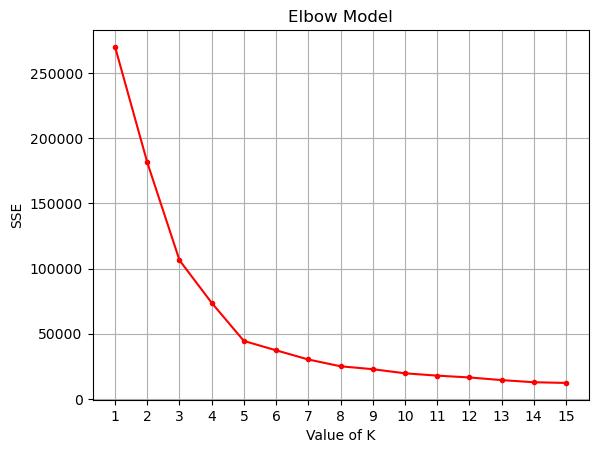

In [34]:
plt.title('Elbow Model')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red');

In [ ]:
#USing Silhouuette Score
silh=[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x,labels)
    silh.append(score)

In [ ]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(1,16))
plt.bar(range(2,16),silh,color='red');

In [10]:
# So here we have decided to take 5 as our number of clusters from above analysis

#K-Means Clustering
km=KMeans(n_clusters=5)
km.fit(x)
y=km.predict(x)
df["Cluster"] = y
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [11]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

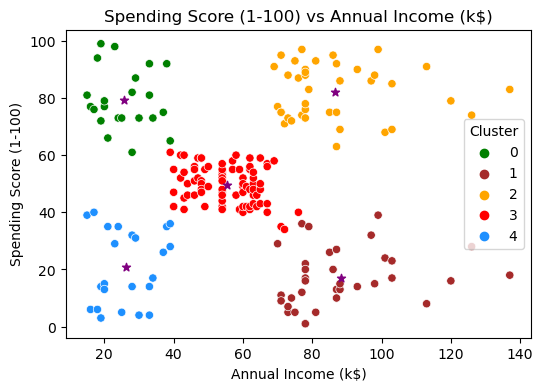

In [12]:
#Scatterplot of the clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",  
                 palette=['green','brown','orange','red','dodgerblue'],data = df )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [15]:
#AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5)
agc.fit(x)
y=agc.fit_predict(x)
df["Cluster"] =y 
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


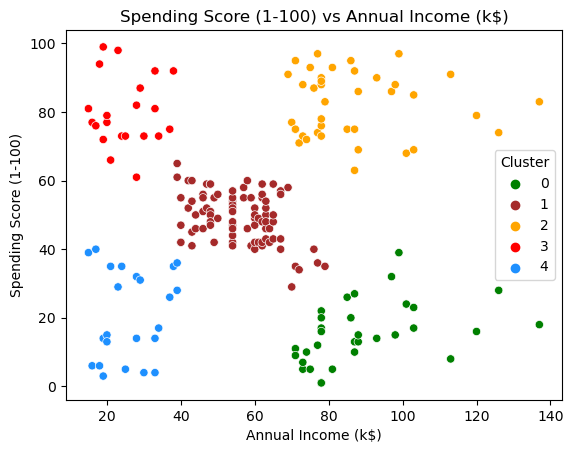

In [16]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="Cluster",  
                 palette=['green','brown','orange','red','dodgerblue'],data = df )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

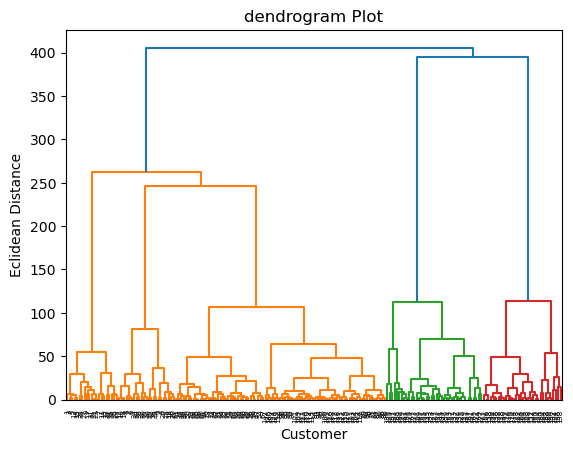

In [28]:
dendrogram = shc.dendrogram(shc.linkage(x,method="ward"))
plt.title("dendrogram Plot")
plt.xlabel("Customer")
plt.ylabel("Eclidean Distance")
plt.grid(False)